#  BATTLE OF NEIGHBORHOOD BLOG

In [118]:
# WEEK 1 BATTLE OF NEIGHBORHOODS

## Introduction
 This project encapsulates leveraging the Foursquare location data to explore the communities and respective neighborhoods of the city of Minneapolis in the state of Minnesota so as to make recommendations for the most suitable location for Asian Business headquarters and manufacturing plant.

# 1.0 PROBLEM STATEMENT 
## 1.1 Background 
"Xantan LLC" South-Korean Based company is looking to expand its business operations in the United states and wanting to set its offices and manufacturing plant in the states of Minnesota and the city of Minneapolis but they are running out of time to deploy scout men to USA for a possible venue of operation meeting key location parameters.
As a consultant i was contacted to solve this complex equation and make a recommendation to the CEO of the company

## 1.2 Key Location Characteristics
> -  Office size within 2000 - 7000 sq ft  
> -  At least one Asian restaurant with 2 mile radius, coffee shop and Grocery
> -  Asian community be most predominant or most important in the area
> -  within one mile from bus station or bus-stop 
> -  Manufacturing plant be Within 5 miles of major Office and a major retail center 
> -  Manufacturing plant with 5 miles of a industrial employment district
> -  Low crime rate

# 1.3. DATA
## 1.3.1 Data Sources
> -  Data will principally come from 'OPENDATAMINNEAPOLIS'
    (The City of Minneapolis public spatial geographic information systems (GIS) and non-spatial data that is regularly requested by private citizens and businesses. These data sets are shared free of charge and with minimal licensing).
    
### 1.3.2 Links to Key data to be used in the study
> -  major retail centers: https://opendata.arcgis.com/datasets/2c35bcea1a7c4a3ba48fa42b039e5aa6_0.geojson 
> -  industrial employment districts: https://opendata.arcgis.com/datasets/4c768a5aa3154f85bd80dc9c5dd0ebf7_0.geojson
> -  neighborhood commercial nodes: https://opendata.arcgis.com/datasets/47a7b23ee906431eb646f863ad2cb2e5_0.geojson
> -  neighborhood crime stat: https://opendata.arcgis.com/datasets/e251c3fe668243719001237d7ac74420_0.geojson 
> -  Transit stations: https://opendata.arcgis.com/datasets/55a4601b78404583be59165006da9ad8_0.geojson 
> -  neighborhood and communities listing: http://www.ci.minneapolis.mn.us/council/maps/index.htm
> -  office lease site: https://www.cityfeet.com/cont/minneapolis-mn/office-space-for-lease?sizeMin=1000&l=3-49492
> -  communities: https://opendata.arcgis.com/datasets/e0a3b6a4c23b4a03b988388553cb9638_0.geojson
> -  neighborhoods: https://opendata.arcgis.com/datasets/7f88316841ce471faa33c89035fb69e8_0.geojson 
> -  Fire stations: https://opendata.arcgis.com/datasets/e697e12884fd4421abaf4a71b513f509_0.geojson 

some of the files can be downloaded in CSV format while i had to scrape websites for rent information, neighborhoods and the communities

### 1.3.3 How will data be used to solve the problem
> -  convert addresses into their equivalent latitude and longitude values unsing Geopy-distance and Nominatim, alternatively i will using OpenCage Geocoder API(free registration on the website)
> -  Four square API will be used to generate to explore communities and neighborhoods in Minneapolis. I will use the explore function to get the most common venue categories in each neighborhood.
> -  leverage the four square API explore function together with k-means clustering algorithm to group the neighborhoods into clusters. 
> -  I will use the Folium library to visualize the neighborhoods in Minneapolis and their emerging clusters with respect to the location specification of Xantan LLc and make a superposition to determine the best location.
> -  I equally made use of charts( horizontal bar charts and pie chart to represent population distribution by RACE in the various (11) communities of Minneapolies. This was instrumental in population density evaluation

### 1.3.4 Possible Target audiences
> -  Multinationals(public, private, NGO) seeking to explore and make strategic business decisons
> -  individuals( seeking to relocate or setup business)
> -  students getting their feet wet with data science methodology and APIs

# WEEK 2 BATTLE OF NEIGHBORHOODS

### IMPORTING ALL LIBRARIES AND DEPENDENCIES

In [119]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#import sys
#!{sys.executable} -m pip install folium 


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
import folium # map rendering library
from folium import plugins
#import sys
#!{sys.executable} -m pip install geopy 
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
import seaborn as sns
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge xlrd --yes

print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

# DATA LOADING AND WRANGLING

### offices for lease data

In [120]:
lease_offices = pd.read_excel(r'data/min_xls_data/mn_offloc.xls')

In [121]:
lease_offices.head()

,address,zip,size_sqft,price_sqft_yr,price_yr
0,301 4th Ave S,MN 55415,13774,20.00,275480.00
1,309 Clifton Ave,MN 55403,1500,60.00,90000.00
2,2916 Hennepin Ave,MN 55408,832,17.40,14476.80
3,1635 Hennepin Ave,MN 55403,4383,22.00,96426.00
4,6015 S Lyndale Ave,MN 55419,1979,25.23,49930.17


### Data on communities and Neighborhoods in Minneapolis

In [122]:
neigh_data = pd.read_excel(r'data/min_xls_data/communities_and_neighborhoods.xls')

In [123]:
neigh_data.head()

,Communities,Neighborhoods
0,Calhoun-Isles,Bryn Mawr
1,Calhoun-Isles,CARAG
2,Calhoun-Isles,Cedar-Isles-Dean
3,Calhoun-Isles,East Calhoun
4,Calhoun-Isles,East Isles


### Data on Community population distribution by Race

In [124]:
pop_data = pd.read_excel(r'data/min_xls_data/communities_and_populations.xls')

In [125]:
pop_data.head()

,Community Name,Acres,Population,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,Calhoun Isles,3515.392648,29913,1057,25832,1007,153,1073,11,51,729
1,Camden,3212.573753,28778,2075,12267,9430,437,3009,7,96,1457
2,Central,1918.221028,29725,1377,19213,5957,395,1884,22,47,830
3,Longfellow,3087.539719,27775,1967,19393,4093,612,750,10,38,912
4,Near North,2966.052216,31192,2655,5444,16339,408,4622,15,91,1618


#### Data on Transit stations in Minneapolis

In [126]:
transit_stations = pd.read_csv('data/min_csv_data/Transit_Stations.csv')

In [127]:
transit_stations.head()

,X,Y,FID,STN_NAME,SECTOR,CATEGORY,LINE
0,-93.270135,44.978653,1,Nicollet Mall,Downtown,,Multiple
1,-93.266020,44.976906,2,Government Plaza IB,Downtown,,Multiple
2,-93.266054,44.976863,3,Government Plaza OB,Downtown,,Multiple
3,-93.259782,44.975057,4,Downtown East/Metrodome IB,Downtown,,Multiple
4,-93.259755,44.975005,5,Downtown East/Metrodome OB,Downtown,,Multiple


In [128]:
df_stn = transit_stations.drop(['SECTOR', 'CATEGORY', 'LINE'], axis = 1)
df_stn.head()

,X,Y,FID,STN_NAME
0,-93.270135,44.978653,1,Nicollet Mall
1,-93.266020,44.976906,2,Government Plaza IB
2,-93.266054,44.976863,3,Government Plaza OB
3,-93.259782,44.975057,4,Downtown East/Metrodome IB
4,-93.259755,44.975005,5,Downtown East/Metrodome OB


In [129]:
df_stn.columns =["logitude","latitude","FID","STN_NAME"]

In [130]:
df_stn.head()

,logitude,latitude,FID,STN_NAME
0,-93.270135,44.978653,1,Nicollet Mall
1,-93.266020,44.976906,2,Government Plaza IB
2,-93.266054,44.976863,3,Government Plaza OB
3,-93.259782,44.975057,4,Downtown East/Metrodome IB
4,-93.259755,44.975005,5,Downtown East/Metrodome OB


In [131]:
trans_stn = df_stn[['FID','STN_NAME','logitude','latitude']]
trans_stn.head()

,FID,STN_NAME,logitude,latitude
0,1,Nicollet Mall,-93.270135,44.978653
1,2,Government Plaza IB,-93.266020,44.976906
2,3,Government Plaza OB,-93.266054,44.976863
3,4,Downtown East/Metrodome IB,-93.259782,44.975057
4,5,Downtown East/Metrodome OB,-93.259755,44.975005


### Data on Industrial employment Districts

In [132]:
industrialemp_district = pd.read_csv('data/min_csv_data/Industrial_Employment_Districts.csv')

In [133]:
industrialemp_district.head()

,FID,LABEL,DISTNAME
0,1,1,Humbolt
1,2,2,Shoreham Yards
2,3,3,North Washington Jobs Park
3,4,7,Mid-City
4,5,6,Seward/Hiawatha


In [134]:
emp_distr = industrialemp_district.drop(['LABEL'], axis =1)
emp_distr

,FID,DISTNAME
0,1,Humbolt
1,2,Shoreham Yards
2,3,North Washington Jobs Park
3,4,Mid-City
4,5,Seward/Hiawatha
5,6,Seward/Hiawatha
6,7,SEMI
7,8,Upper River
8,9,North Washington Jobs Park
9,10,Shoreham Yards


### Data on major retail centers

In [135]:
mjretail_center = pd.read_csv('data/min_csv_data/Major_Retail_Centers.csv')

In [136]:
mjretail_center.head()

,X,Y,FID,NAME
0,-93.231767,45.004823,1,Quarry Center Dr & 35W
1,-93.319135,44.949246,2,Calhoun & Excelsior
2,-93.277380,44.894947,3,60th & Nicollet
3,-93.289634,44.894374,4,60th & Lyndale
4,-93.271446,44.977852,5,Nicollet Mall


In [137]:
mjretail_center.columns =["logitude","latitude","FID","DIST_NAME"]

In [138]:
trade_centers = mjretail_center[['FID','DIST_NAME','logitude','latitude']] 

In [139]:
trade_centers.head()

,FID,DIST_NAME,logitude,latitude
0,1,Quarry Center Dr & 35W,-93.231767,45.004823
1,2,Calhoun & Excelsior,-93.319135,44.949246
2,3,60th & Nicollet,-93.277380,44.894947
3,4,60th & Lyndale,-93.289634,44.894374
4,5,Nicollet Mall,-93.271446,44.977852


### Data on major Fire stations

In [140]:
fire_stations = pd.read_csv('data/min_csv_data/MFD_FireStations.csv')

In [141]:
fire_stations.head()

,X,Y,OBJECTID,STATION_NU,STR_NAME,CHIEF_LOCA,HAZMAT,BUILD_COLLAPSE,RIG_COUNT
0,-93.261030,44.977491,1,1,530 3RD ST S,N,N,N,1
1,-93.267367,45.001027,2,2,143 13TH AVE NE,Y,N,N,1
2,-93.286848,44.989382,3,4,1101 6TH ST N,N,N,N,2
3,-93.252605,44.953576,4,5,2700 BLOOMINGTON AVE,N,N,N,1
4,-93.275552,44.967296,5,6,121 15TH ST E,Y,N,Y,3


In [142]:
df_fire = fire_stations.drop(['CHIEF_LOCA','HAZMAT','BUILD_COLLAPSE','RIG_COUNT'], axis = 1)
df_fire.columns =["longitude","latitude","OBJECTID","STATION_NU","STATION_ADD"]
fire_stn = df_fire[['OBJECTID','STATION_NU','STATION_ADD','longitude','latitude']]
fire_stn.head()

,OBJECTID,STATION_NU,STATION_ADD,longitude,latitude
0,1,1,530 3RD ST S,-93.261030,44.977491
1,2,2,143 13TH AVE NE,-93.267367,45.001027
2,3,4,1101 6TH ST N,-93.286848,44.989382
3,4,5,2700 BLOOMINGTON AVE,-93.252605,44.953576
4,5,6,121 15TH ST E,-93.275552,44.967296


### Crime data by Neighborhood

In [143]:
nghbd_crimes = pd.read_csv('data/min_csv_data/NEIGHBORHOOD_CRIME_STATS.csv')

In [144]:
nghbd_crimes.head()

,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,3001,EAST PHILLIPS,Aggravated Assault,4.0,12,2017
1,3002,EAST PHILLIPS,Arson,NaN,12,2017
2,3003,EAST PHILLIPS,Auto Theft,9.0,12,2017
3,3004,EAST PHILLIPS,Burglary,3.0,12,2017
4,3005,EAST PHILLIPS,Homicide,NaN,12,2017


In [145]:
n_crimes= nghbd_crimes.fillna(1)
n_crimes.tail()

,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
14075,14076,Z_** NOT ASSIGNED **,Burglary,0.0,3,2019
14076,14077,Z_** NOT ASSIGNED **,Homicide,0.0,3,2019
14077,14078,Z_** NOT ASSIGNED **,Larceny,1.0,3,2019
14078,14079,Z_** NOT ASSIGNED **,Rape,4.0,3,2019
14079,14080,Z_** NOT ASSIGNED **,Robbery,2.0,3,2019


In [146]:
df2 = n_crimes[n_crimes.neighborhood != 'Z_** NOT ASSIGNED **']
df2.tail(5)

,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
14067,14068,Windom Park,Burglary,2.0,3,2019
14068,14069,Windom Park,Homicide,0.0,3,2019
14069,14070,Windom Park,Larceny,7.0,3,2019
14070,14071,Windom Park,Rape,1.0,3,2019
14071,14072,Windom Park,Robbery,0.0,3,2019


In [147]:
crime_data = df2[df2.neighborhood != '** NOT ASSIGNED **']
crime_data.tail()

,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
14067,14068,Windom Park,Burglary,2.0,3,2019
14068,14069,Windom Park,Homicide,0.0,3,2019
14069,14070,Windom Park,Larceny,7.0,3,2019
14070,14071,Windom Park,Rape,1.0,3,2019
14071,14072,Windom Park,Robbery,0.0,3,2019


In [148]:
df3 = crime_data.duplicated()
df3.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [149]:
df4 = crime_data['neighborhood'].describe()

In [150]:
df4.head()

count     13920
unique      172
top        ECCO
freq        160
Name: neighborhood, dtype: object

In [151]:
df5 = crime_data['neighborhood'].value_counts().to_dict()['ECCO']
df5

160

In [152]:
crime_count = crime_data['neighborhood'].value_counts()
crime_count.head()

ECCO            160
CARAG           160
Lyndale          80
Marcy Holmes     80
MORRIS PARK      80
Name: neighborhood, dtype: int64

### DATA for Police Incidents in 2018

In [153]:
dfp = pd.read_csv('data/min_csv_data/Police_Incidents_2018.csv') 

In [154]:
dfp.head(2)

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,OBJECTID
0,0036XX Harriet AV S,3763303,MP 2018 168775,5,2018-05-24T08:00:00.000Z,2018-05-23T22:00:00.000Z,22:00:00,BURGD,Burglary Of Dwelling,6,2018-05-24T09:12:52.000Z,20680.0,44.936795,-93.285635,-1.038451e+07,5.611577e+06,KING FIELD,2018-05-24T10:01:31.000Z,2018-05-24T20:00:32.000Z,7001
1,0026XX 15 AV S,3763305,MP 2018 168816,3,2018-05-24T09:16:00.000Z,2018-05-24T02:00:00.000Z,02:00:00,BURGD,Burglary Of Dwelling,6,2018-05-24T09:15:56.000Z,16880.0,44.954638,-93.253719,-1.038096e+07,5.614383e+06,MIDTOWN PHILLIPS,2018-05-24T14:55:16.000Z,2018-05-24T20:00:32.000Z,7002


In [155]:
#df[df.columns[~df.columns.isin(['C','D'])]]
#dfp1 = dfp[dfp.columns[~dfp.columns.isin(['Description', 'UCRCode','GBSID', 'Lat', 'Long','Neighborhood'])]] 
#dfp1 = dfp[dfp.columns.difference(['Description', 'UCRCode','GBSID', 'Lat', 'Long','Neighborhood'])]

In [156]:
dfp1 = dfp[dfp.columns[dfp.columns.isin(['Description', 'UCRCode', 'Lat', 'Long','Neighborhood','OBJECTID'])]] 

In [157]:
dfp1.head()

,Description,UCRCode,Lat,Long,Neighborhood,OBJECTID
0,Burglary Of Dwelling,6,44.936795,-93.285635,KING FIELD,7001
1,Burglary Of Dwelling,6,44.954638,-93.253719,MIDTOWN PHILLIPS,7002
2,Other Theft,7,45.014066,-93.247337,AUDUBON PARK,7003
3,Theft By Swindle,7,45.004791,-93.281795,HAWTHORNE,7004
4,Theft From Motr Vehc,7,44.969658,-93.250607,CEDAR RIVERSIDE,7005


In [158]:
dfp2 = dfp1.columns = ['Description', 'UCRCode', 'latitude', 'longitude','Neighborhood','OBJECTID']

In [159]:
dfp3 = dfp1[['OBJECTID','Neighborhood','UCRCode','Description','longitude','latitude']] 

In [160]:
dfp3.head()

,OBJECTID,Neighborhood,UCRCode,Description,longitude,latitude
0,7001,KING FIELD,6,Burglary Of Dwelling,-93.285635,44.936795
1,7002,MIDTOWN PHILLIPS,6,Burglary Of Dwelling,-93.253719,44.954638
2,7003,AUDUBON PARK,7,Other Theft,-93.247337,45.014066
3,7004,HAWTHORNE,7,Theft By Swindle,-93.281795,45.004791
4,7005,CEDAR RIVERSIDE,7,Theft From Motr Vehc,-93.250607,44.969658


In [161]:
 # dict(list(dfp3.groupby(['Neighborhood','UCRCode'])))

In [162]:
# geo locator for latitudes and longitudes
import sys
!{sys.executable} -m pip install opencage
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
print('libraries imported')

libraries imported


In [163]:
key = 'fc258ac2c8a046e5925a12bb0671f87f'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

In [164]:
# create empty lists to store your longitude and latitude values
list_lat = []  

list_long = []

for index, row in neigh_data.iterrows(): # iterate over rows in neighborhood dataframe in the data wrangling section



    City = row['Neighborhoods']
    State = 'Minnesota'       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long) 

# create new columns from lists and appending to data frame   

neigh_data['latitude'] = list_lat   

neigh_data['longitude'] = list_long 
neigh_data.head() 

,Communities,Neighborhoods,latitude,longitude
0,Calhoun-Isles,Bryn Mawr,44.973826,-93.308779
1,Calhoun-Isles,CARAG,44.942977,-93.293319
2,Calhoun-Isles,Cedar-Isles-Dean,44.954144,-93.316987
3,Calhoun-Isles,East Calhoun,44.943828,-93.304247
4,Calhoun-Isles,East Isles,44.955573,-93.299393


In [165]:
print('The City of Minneapolis has {} communities and {} neighborhoods.'.format(
        len(neigh_data['Communities'].unique()),
        neigh_data.shape[0]
    )
) 

The City of Minneapolis has 11 communities and 84 neighborhoods.


In [166]:
neigh_data.isnull().sum().sum()

0

#### Use geopy library to get the latitude and longitude values of the city of Minneapolis

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>tr_explorer</em>, as shown below.

In [167]:
address = 'City of Minneapolis'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of Minneapolis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of Minneapolis are 44.9918412, -93.2744680743963.


#### Create a map of Minneapolis with neighborhoods superimposed on top

In [168]:
# create map of Minneapolis using latitude and longitude values obtained above

map_mpolis = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Communities, Neighborhoods in zip(neigh_data['latitude'], neigh_data['longitude'], neigh_data['Communities'], neigh_data['Neighborhoods']):
    label = '{}, {}'.format(Neighborhoods, Communities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc', #'#0f0f0f',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mpolis)  
    
map_mpolis 

## exploring and segmenting neighborhoods in Minneapolis

#### Defining the Foursquare Credentials and Version

In [169]:
CLIENT_ID = 'H1PM1VUQUD0SHFAZV1ZQFZBQ4P1ZQGFVYLU1XQYFDMP4YMGX' # your Foursquare ID
CLIENT_SECRET = 'VAAIO0YDP4JRVVSSAUEICBNV2THCLUZKB3URKQP2DR5BOJZH' # your Foursquare Secret
VERSION = '20190416' # Foursquare API version equal to current date

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H1PM1VUQUD0SHFAZV1ZQFZBQ4P1ZQGFVYLU1XQYFDMP4YMGX
CLIENT_SECRET:VAAIO0YDP4JRVVSSAUEICBNV2THCLUZKB3URKQP2DR5BOJZH


## 2. Explore Neighborhoods in the whole of the city of Minneapolis

### Define a function the get 100 venues around a mile radius for each neighborhood

In [170]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood in Minneapolis

In [171]:
LIMIT =50
minpolis_venues = getNearbyVenues(names=neigh_data['Neighborhoods'],
                                   latitudes=neigh_data['latitude'],
                                   longitudes=neigh_data['longitude']
                                  )

Bryn Mawr
CARAG
Cedar-Isles-Dean
East Calhoun
East Isles
Kenwood
Lowry Hill
Lowry Hill East
West Calhoun
Cleveland
Folwell
Lind-Bohanon
McKinely
Shingle Creek
Victory
Webber-Camden
Downtown East
Downtown West
Elliot Park
Loring Park
North Loop
Stevens Square
Cooper
Hiawatha
Howe
Longfellow
Seward
Harrison
Hawthorne
Jordan
Near North
Sumner-Glenwood
Willard Hay
Diamond Lake
Ericsson
Field
Hale
Keewaydin
Minnehaha
Morris Park
Northrup
Page
Regina
Wenonah
Audubon Park
Beltrami
Bottineau
Columbia Park
Holland
Logan Park
Marshall Terrace
Northeast Park
Sheridan
St. Anthony East
St. Anthony West
Waite Park
Windom Park
East Phillips,, , 
 Midtown Phillips
Phillips West
Ventura Village
Bancroft
Bryant
Central
Corcoran
Lyndale
Powderhorn Park
Standish
Whittier
Armatage
East Harriet
Fulton
Kenny
King Field
Linden Hills
Lynnhurst
Tangletown
Windom
Cedar-Riverside
Como
Marcy-Holmes
Nicollet Island
Prospect Park
University


In [172]:
# getting high summary details 
print(minpolis_venues.shape)
minpolis_venues.head()

(962, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bryn Mawr,44.973826,-93.308779,Cuppa Java,44.973563,-93.308533,Coffee Shop
1,Bryn Mawr,44.973826,-93.308779,Bryn Mawr Pizza and Deli,44.973631,-93.308545,Pizza Place
2,Bryn Mawr,44.973826,-93.308779,Bryn Mawr Market,44.973570,-93.308827,Grocery Store
3,Bryn Mawr,44.973826,-93.308779,Bryn Mawr Coffee Shop,44.974603,-93.306942,Coffee Shop
4,Bryn Mawr,44.973826,-93.308779,Clear Body & Home,44.973515,-93.308506,Massage Studio


### number of venues returned by four square API for each neighborhood

In [173]:
minpolis_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Midtown Phillips,6,6,6,6,6,6
Armatage,7,7,7,7,7,7
Audubon Park,16,16,16,16,16,16
Bancroft,6,6,6,6,6,6
Bottineau,20,20,20,20,20,20
Bryant,4,4,4,4,4,4
Bryn Mawr,7,7,7,7,7,7
CARAG,17,17,17,17,17,17
Cedar-Isles-Dean,5,5,5,5,5,5


#### from the above results lets find the number of unique categories

In [174]:
print('There are {} uniques categories.'.format(len(minpolis_venues['Venue Category'].unique())))

There are 229 uniques categories.


# 3.2. DATA ANALYSIS

## Analyzing Each Neighborhood

In [175]:
# one hot encoding
minneapolis_onehot = pd.get_dummies(minpolis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
minneapolis_onehot['Neighborhood'] = minpolis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [minneapolis_onehot.columns[-1]] + list(minneapolis_onehot.columns[:-1])
minneapolis_onehot = minneapolis_onehot[fixed_columns]

minneapolis_onehot.head()

,Neighborhood,ATM,Acupuncturist,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Event Service,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,New American Restaurant,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stables,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Bryn Mawr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bryn Mawr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [176]:
# new dataframe size
minneapolis_onehot.shape

(962, 230)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [177]:
minneapolis_grouped = minneapolis_onehot.groupby('Neighborhood').mean().reset_index()
minneapolis_grouped

,Neighborhood,ATM,Acupuncturist,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Event Service,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,New American Restaurant,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stables,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Midtown Phillips,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000

In [178]:
# new size
minneapolis_grouped.shape

(81, 230)

#### Let's print each neighborhood along with the top 5 most common venues

In [179]:
num_top_venues = 5

for hood in minneapolis_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = minneapolis_grouped[minneapolis_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Midtown Phillips----
               venue  freq
0        Coffee Shop  0.33
1  Electronics Store  0.17
2     Sandwich Place  0.17
3         Food Court  0.17
4                Gym  0.17


----Armatage----
          venue  freq
0    Skate Park  0.14
1   Flower Shop  0.14
2  Home Service  0.14
3         Trail  0.14
4   Pizza Place  0.14


----Audubon Park----
                    venue  freq
0       Convenience Store  0.12
1          Cosmetics Shop  0.12
2  Thrift / Vintage Store  0.06
3        Department Store  0.06
4           Movie Theater  0.06


----Bancroft----
                  venue  freq
0        Discount Store  0.17
1         Grocery Store  0.17
2           Yoga Studio  0.17
3         Garden Center  0.17
4  Fast Food Restaurant  0.17


----Bottineau----
                     venue  freq
0                     Park  0.15
1                      Bar  0.10
2         Theme Restaurant  0.10
3  New American Restaurant  0.05
4        Food & Drink Shop  0.05


----Bryant----
            

In [180]:
# sort venues in descending order through the application of a function that will loop through the results above
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood by calling the above function

In [181]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = minneapolis_grouped['Neighborhood']

for ind in np.arange(minneapolis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(minneapolis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Midtown Phillips,Coffee Shop,Gym,Food Court,Electronics Store,Sandwich Place,Zoo,Football Stadium,Food Truck,Food & Drink Shop,Food
1,Armatage,Park,Home Service,Skate Park,Trail,Convenience Store,Flower Shop,Pizza Place,Food,Event Space,Fishing Store
2,Audubon Park,Convenience Store,Cosmetics Shop,Movie Theater,Jewelry Store,Chinese Restaurant,Coffee Shop,Event Service,Park,Thrift / Vintage Store,Bakery
3,Bancroft,Yoga Studio,Grocery Store,Garden Center,Caribbean Restaurant,Fast Food Restaurant,Discount Store,Dog Run,Dive Bar,French Restaurant,Football Stadium
4,Bottineau,Park,Bar,Theme Restaurant,BBQ Joint,New American Restaurant,Food & Drink Shop,Coffee Shop,German Restaurant,Beer Garden,Gym


## 3.3 Cluster Neighborhoods

In [182]:
# set number of clusters
kclusters = 6

minneapolis_grouped_clustering = minneapolis_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(minneapolis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 4, 4, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [183]:
minneapolis_grouped_clustering.head()

,ATM,Acupuncturist,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Event Service,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,New American Restaurant,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stables,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.166667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [184]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

minneapolis_merged = neigh_data

# merge minneapolis_grouped with neigh_data to add latitude/longitude for each neighborhood
minneapolis_merged = minneapolis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

minneapolis_merged # check the last columns!

,Communities,Neighborhoods,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Calhoun-Isles,Bryn Mawr,44.973826,-93.308779,2.0,Coffee Shop,Grocery Store,Intersection,Pizza Place,Massage Studio,Latin American Restaurant,Fishing Store,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot
1,Calhoun-Isles,CARAG,44.942977,-93.293319,1.0,Coffee Shop,Park,Playground,Cosmetics Shop,Café,Boutique,Massage Studio,Gift Shop,Comic Shop,Music Store
2,Calhoun-Isles,Cedar-Isles-Dean,44.954144,-93.316987,1.0,Bridge,Beach,American Restaurant,Tourist Information Center,Gym / Fitness Center,Food,Fishing Spot,Fishing Store,Flower Shop,Food Court
3,Calhoun-Isles,East Calhoun,44.943828,-93.304247,1.0,Ice Cream Shop,Beach,Scenic Lookout,Comic Shop,Cosmetics Shop,Massage Studio,Fishing Store,Fish & Chips Shop,Fishing Spot,Food
4,Calhoun-Isles,East Isles,44.955573,-93.299393,1.0,Coffee Shop,Pizza Place,Mexican Restaurant,Boutique,Indian Restaurant,Spa,Smoke Shop,Skating Rink,Shipping Store,Sandwich Place
5,Calhoun-Isles,Kenwood,44.962087,-93.310523,1.0,American Restaurant,Baseball Field,Café,Tailor Shop,Bakery,Bookstore,Park,Arts & Crafts Store,Zoo,Flower Shop
6,Calhoun-Isles,Lowry Hill,44.964797,-93.296273,1.0,Restaurant,Ice Cream Shop,Steakhouse,Gift Shop,Liquor Store,Electronics Store,Bar,American Restaurant,Acupuncturist,Donut Shop
7,Calhoun-Isles,Lowry Hill East,44.955632,-93.291982,1.0,Pizza Place,Coffee Shop,Breakfast Spot,Mexican Restaurant,Café,Boutique,Yoga Studio,Asian Restaurant,American Restaurant,Record Shop
8,Calhoun-Isles,West Calhoun,44.942517,-93.319656,1.0,Moving Target,Trail,Frozen Yogurt Shop,Burger Joint,Bus Station,Event Space,Performing Arts Venue,Fishing Store,Flower Shop,Food & Drink Shop
9,Camden,Cleveland,45.017941,-93.312959,1.0,Music Venue,Food Truck,Trail,Zoo,Exhibit,Football Stadium,Food Court,Food & Drink Shop,Food,Flower Shop


In [185]:
minneapolis_merged['Cluster Labels'].isnull().sum().sum()

3

In [186]:
minneapolis_merged.dropna(how ='any', axis= 0, inplace = True)

In [187]:
minneapolis_merged.isnull().sum().sum()

0

In [188]:
minneapolis_merged['Cluster Labels'] = (minneapolis_merged['Cluster Labels'])
minneapolis_merged.head()

,Communities,Neighborhoods,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Calhoun-Isles,Bryn Mawr,44.973826,-93.308779,2.0,Coffee Shop,Grocery Store,Intersection,Pizza Place,Massage Studio,Latin American Restaurant,Fishing Store,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot
1,Calhoun-Isles,CARAG,44.942977,-93.293319,1.0,Coffee Shop,Park,Playground,Cosmetics Shop,Café,Boutique,Massage Studio,Gift Shop,Comic Shop,Music Store
2,Calhoun-Isles,Cedar-Isles-Dean,44.954144,-93.316987,1.0,Bridge,Beach,American Restaurant,Tourist Information Center,Gym / Fitness Center,Food,Fishing Spot,Fishing Store,Flower Shop,Food Court
3,Calhoun-Isles,East Calhoun,44.943828,-93.304247,1.0,Ice Cream Shop,Beach,Scenic Lookout,Comic Shop,Cosmetics Shop,Massage Studio,Fishing Store,Fish & Chips Shop,Fishing Spot,Food
4,Calhoun-Isles,East Isles,44.955573,-93.299393,1.0,Coffee Shop,Pizza Place,Mexican Restaurant,Boutique,Indian Restaurant,Spa,Smoke Shop,Skating Rink,Shipping Store,Sandwich Place


visualize the resulting clusters

In [189]:

minmap_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(minneapolis_merged['latitude'], minneapolis_merged['longitude'], minneapolis_merged['Neighborhoods'], minneapolis_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(minmap_clusters)
minmap_clusters 

## 3.4 CLUSTER EXAMINATION

examine each cluster and determine the discriminating venue categories that distinguish each cluster

#### Cluster 1

In [190]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 0, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,McKinely,Restaurant,Lawyer,Zoo,Exhibit,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop


#### Cluster 2

In [191]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 1, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,CARAG,Coffee Shop,Park,Playground,Cosmetics Shop,Café,Boutique,Massage Studio,Gift Shop,Comic Shop,Music Store
2,Cedar-Isles-Dean,Bridge,Beach,American Restaurant,Tourist Information Center,Gym / Fitness Center,Food,Fishing Spot,Fishing Store,Flower Shop,Food Court
3,East Calhoun,Ice Cream Shop,Beach,Scenic Lookout,Comic Shop,Cosmetics Shop,Massage Studio,Fishing Store,Fish & Chips Shop,Fishing Spot,Food
4,East Isles,Coffee Shop,Pizza Place,Mexican Restaurant,Boutique,Indian Restaurant,Spa,Smoke Shop,Skating Rink,Shipping Store,Sandwich Place
5,Kenwood,American Restaurant,Baseball Field,Café,Tailor Shop,Bakery,Bookstore,Park,Arts & Crafts Store,Zoo,Flower Shop
6,Lowry Hill,Restaurant,Ice Cream Shop,Steakhouse,Gift Shop,Liquor Store,Electronics Store,Bar,American Restaurant,Acupuncturist,Donut Shop
7,Lowry Hill East,Pizza Place,Coffee Shop,Breakfast Spot,Mexican Restaurant,Café,Boutique,Yoga Studio,Asian Restaurant,American Restaurant,Record Shop
8,West Calhoun,Moving Target,Trail,Frozen Yogurt Shop,Burger Joint,Bus Station,Event Space,Performing Arts Venue,Fishing Store,Flower Shop,Food & Drink Shop
9,Cleveland,Music Venue,Food Truck,Trail,Zoo,Exhibit,Football Stadium,Food Court,Food & Drink Shop,Food,Flower Shop
10,Folwell,Dessert Shop,Print Shop,Art Gallery,Bus Stop,Brewery,Business Service,Bus Station,Intersection,Donut Shop,Fishing Store


#### Cluster 3

In [192]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 2, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bryn Mawr,Coffee Shop,Grocery Store,Intersection,Pizza Place,Massage Studio,Latin American Restaurant,Fishing Store,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot
58,Midtown Phillips,Coffee Shop,Gym,Food Court,Electronics Store,Sandwich Place,Zoo,Football Stadium,Food Truck,Food & Drink Shop,Food
59,Phillips West,Coffee Shop,Gym,American Restaurant,Trail,Food Court,Grocery Store,Scandinavian Restaurant,Sandwich Place,Electronics Store,Museum
67,Standish,Bookstore,School,Coffee Shop,Zoo,Fast Food Restaurant,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop


#### Cluster 4

In [193]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 3, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Longfellow,Playground,Fast Food Restaurant,Zoo,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food


#### Cluster 5

In [194]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 4, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Victory,Park,Plaza,Road,Fishing Spot,Coffee Shop,Exhibit,Food Truck,Food Court,Food & Drink Shop,Food
15,Webber-Camden,Park,Convenience Store,Bar,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
17,Downtown West,Bar,Grocery Store,Park,American Restaurant,Pizza Place,Fishing Store,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Zoo
27,Harrison,American Restaurant,Park,Beer Store,Convenience Store,Vegetarian / Vegan Restaurant,Grocery Store,Food & Drink Shop,Food Court,Farmers Market,Food Truck
42,Regina,Gym,Park,Discount Store,Movie Theater,Cosmetics Shop,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
44,Audubon Park,Convenience Store,Cosmetics Shop,Movie Theater,Jewelry Store,Chinese Restaurant,Coffee Shop,Event Service,Park,Thrift / Vintage Store,Bakery
69,Armatage,Park,Home Service,Skate Park,Trail,Convenience Store,Flower Shop,Pizza Place,Food,Event Space,Fishing Store
72,Kenny,Brewery,Plaza,Construction & Landscaping,Park,Dive Bar,Fast Food Restaurant,French Restaurant,Football Stadium,Food Truck,Food Court
80,Marcy-Holmes,Convenience Store,Design Studio,Café,Historic Site,Coworking Space,Greek Restaurant,American Restaurant,New American Restaurant,Food Truck,Fish & Chips Shop


#### Cluster 6

In [195]:
minneapolis_merged.loc[minneapolis_merged['Cluster Labels'] == 5, minneapolis_merged.columns[[1] + list(range(5, minneapolis_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Keewaydin,Yoga Studio,Coffee Shop,Gift Shop,Beach,Park,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop
73,King Field,Park,Coffee Shop,Toy / Game Store,Yoga Studio,American Restaurant,Salon / Barbershop,Bookstore,Fish & Chips Shop,Fishing Spot,Fishing Store


In [196]:
trans_stn.isnull().sum().sum()

0

In [197]:
trans_stn['STN_NAME'].dtypes

dtype('O')

In [198]:
trans_stn.dropna(inplace =True, how = 'any', axis =0)

In [199]:
trans_stn['STN_NAME'] = trans_stn['STN_NAME'].astype(str)

In [200]:
for i in trans_stn["STN_NAME"]:
    trans_stn["STN_NAME"] = trans_stn["STN_NAME"].str.replace('/', ' ')
trans_stn

,FID,STN_NAME,logitude,latitude
0,1,Nicollet Mall,-93.270135,44.978653
1,2,Government Plaza IB,-93.266020,44.976906
2,3,Government Plaza OB,-93.266054,44.976863
3,4,Downtown East Metrodome IB,-93.259782,44.975057
4,5,Downtown East Metrodome OB,-93.259755,44.975005
5,6,Cedar-Riverside,-93.250957,44.968411
6,7,Franklin Avenue,-93.246924,44.962511
7,8,Lake Street,-93.238913,44.948370
8,9,38th Street,-93.229460,44.934687
9,10,46th Street IB,-93.219745,44.920724


### Supper imposing the desired location creteria on a clustered map of minneapolis

In [201]:
latitude = 44.9918412 
longitude = -93.2744680743963

minmap_mixed = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers of transit stations to map
for lat, lng, label in zip(trans_stn['latitude'], trans_stn['logitude'], trans_stn['STN_NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   #CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        #fill=True,
        fill_color='#3186cc',
        fill_opacity= 1.5).add_to(minmap_mixed)  
    
minmap_mixed


In [202]:
lease_offices.head()

,address,zip,size_sqft,price_sqft_yr,price_yr
0,301 4th Ave S,MN 55415,13774,20.00,275480.00
1,309 Clifton Ave,MN 55403,1500,60.00,90000.00
2,2916 Hennepin Ave,MN 55408,832,17.40,14476.80
3,1635 Hennepin Ave,MN 55403,4383,22.00,96426.00
4,6015 S Lyndale Ave,MN 55419,1979,25.23,49930.17


In [203]:
# create empty lists to store your longitude and latitude values
list_lat = []  

list_long = []

for index, row in lease_offices.iterrows(): # iterate over rows in lease_offices dataframe in the data wrangling section



    City = row['address']
    State = 'Minnesota'       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long) 

# create new columns from lists and appending to data frame   

lease_offices['latitude'] = list_lat   

lease_offices['longitude'] = list_long 

lease_data = lease_offices.drop_duplicates(['address']).reset_index(drop =True)
lease_data.head()

,address,zip,size_sqft,price_sqft_yr,price_yr,latitude,longitude
0,301 4th Ave S,MN 55415,13774,20.00,275480.00,44.978220,-93.263462
1,309 Clifton Ave,MN 55403,1500,60.00,90000.00,44.965905,-93.283568
2,2916 Hennepin Ave,MN 55408,832,17.40,14476.80,44.973528,-93.283389
3,1635 Hennepin Ave,MN 55403,4383,22.00,96426.00,44.972120,-93.286360
4,6015 S Lyndale Ave,MN 55419,1979,25.23,49930.17,44.908639,-93.288277


In [204]:
lease_data['adrress']= lease_data['address'].astype(str)

In [205]:
lease_data['price_yr'] = round(lease_data['price_yr'],2)

In [206]:
lease_data.dtypes

address           object
zip               object
size_sqft          int64
price_sqft_yr    float64
price_yr         float64
latitude         float64
longitude        float64
adrress           object
dtype: object

In [207]:
lease_data

,address,zip,size_sqft,price_sqft_yr,price_yr,latitude,longitude,adrress
0,301 4th Ave S,MN 55415,13774,20.00,275480.00,44.978220,-93.263462,301 4th Ave S
1,309 Clifton Ave,MN 55403,1500,60.00,90000.00,44.965905,-93.283568,309 Clifton Ave
2,2916 Hennepin Ave,MN 55408,832,17.40,14476.80,44.973528,-93.283389,2916 Hennepin Ave
3,1635 Hennepin Ave,MN 55403,4383,22.00,96426.00,44.972120,-93.286360,1635 Hennepin Ave
4,6015 S Lyndale Ave,MN 55419,1979,25.23,49930.17,44.908639,-93.288277,6015 S Lyndale Ave
5,783 NE Harding St,MN 55413,9415,14.00,131810.00,44.997376,-93.221615,783 NE Harding St
6,400 N 1st St,MN 55401,6638,15.95,105876.10,44.987114,-93.271355,400 N 1st St
7,2301 N 49th Ave,MN 55430,220,20.70,4554.00,45.043915,-93.288872,2301 N 49th Ave
8,600 Washington Ave N,MN 55401,2200,15.00,33000.00,44.987045,-93.275913,600 Washington Ave N
9,2200 E Franklin Ave,MN 55404,3451,16.00,55216.00,44.962829,-93.240739,2200 E Franklin Ave


### Lease Offices and transit stations display

In [208]:
latitude = 44.9918412 
longitude = -93.2744680743963

minmap_mixed = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers of transit stations to map
for lat, lng, label in zip(trans_stn['latitude'], trans_stn['logitude'], 'transit_station@'+ ' ' + trans_stn['STN_NAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        #fill=True,
        fill_color='#3186cc',
        fill_opacity= 1.5).add_to(minmap_mixed) 


# add markers for office rentals
for lat, lng, address, in zip(lease_data['latitude'], lease_data['longitude'], '$' + lease_data['price_yr'].astype(str) + '/yr' + ' , ' + lease_data['address'].astype(str)
                                              + ' , ' + 'sqft' + ' ' + lease_data['size_sqft'].astype(str)):
    address = folium.Popup(address, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        radius=10,
        number_of_sides=5,
        popup=address,
        color='green',
        #fill=True,
        fill_color='green',
        fill_opacity= 1.5).add_to(minmap_mixed) 
    
minmap_mixed

Displaying Major Trade Centers with respect to transit stations and offices spaces

In [209]:
trade_centers.head()

,FID,DIST_NAME,logitude,latitude
0,1,Quarry Center Dr & 35W,-93.231767,45.004823
1,2,Calhoun & Excelsior,-93.319135,44.949246
2,3,60th & Nicollet,-93.277380,44.894947
3,4,60th & Lyndale,-93.289634,44.894374
4,5,Nicollet Mall,-93.271446,44.977852


In [210]:
trade_centers.dtypes

FID            int64
DIST_NAME     object
logitude     float64
latitude     float64
dtype: object

In [211]:
for i in trade_centers["DIST_NAME"]:
    trade_centers["DIST_NAME"] = trade_centers["DIST_NAME"].str.replace('&', 'and')
trade_centers

,FID,DIST_NAME,logitude,latitude
0,1,Quarry Center Dr and 35W,-93.231767,45.004823
1,2,Calhoun and Excelsior,-93.319135,44.949246
2,3,60th and Nicollet,-93.277380,44.894947
3,4,60th and Lyndale,-93.289634,44.894374
4,5,Nicollet Mall,-93.271446,44.977852
5,6,Nicollet and Lake,-93.277933,44.948351
6,7,West Broadway and Lyndale,-93.287980,44.999134
7,8,Hiawatha and Lake,-93.236758,44.949494


INDUSTRIAL DISTRICT DATA PROCESSING FOR MAP

In [212]:
emp_distr.head()

,FID,DISTNAME
0,1,Humbolt
1,2,Shoreham Yards
2,3,North Washington Jobs Park
3,4,Mid-City
4,5,Seward/Hiawatha


In [213]:
for i in emp_distr["DISTNAME"]:
    emp_distr["DISTNAME"] = emp_distr["DISTNAME"].str.replace('/', '-')
emp_distr

,FID,DISTNAME
0,1,Humbolt
1,2,Shoreham Yards
2,3,North Washington Jobs Park
3,4,Mid-City
4,5,Seward-Hiawatha
5,6,Seward-Hiawatha
6,7,SEMI
7,8,Upper River
8,9,North Washington Jobs Park
9,10,Shoreham Yards


In [214]:
emp_distr['DISTNAME'] = emp_distr['DISTNAME'].drop_duplicates()
emp_dist = emp_distr.dropna()
emp_dist

,FID,DISTNAME
0,1,Humbolt
1,2,Shoreham Yards
2,3,North Washington Jobs Park
3,4,Mid-City
4,5,Seward-Hiawatha
6,7,SEMI
7,8,Upper River


In [215]:
# create empty lists to store your longitude and latitude values
list_lat = []  

list_long = []

for index, row in emp_dist.iterrows(): # iterate over rows for industrial districtemployment dataframe in the data wrangling section



    City = row['DISTNAME']
    State = 'Minnesota'       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long) 

# create new columns from lists and appending to data frame   

emp_dist['latitude'] = list_lat   

emp_dist['longitude'] = list_long 

empl_data = emp_dist.drop_duplicates(['DISTNAME']).reset_index(drop =True)
empl_data.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,FID,DISTNAME,latitude,longitude
0,1,Humbolt,45.331919,-93.736600
1,2,Shoreham Yards,46.757459,-95.898939
2,3,North Washington Jobs Park,43.687829,-92.392089
3,4,Mid-City,47.142938,-91.467941
4,5,Seward-Hiawatha,44.921322,-93.209388


police incident plotting

In [216]:
dfp3.head()

,OBJECTID,Neighborhood,UCRCode,Description,longitude,latitude
0,7001,KING FIELD,6,Burglary Of Dwelling,-93.285635,44.936795
1,7002,MIDTOWN PHILLIPS,6,Burglary Of Dwelling,-93.253719,44.954638
2,7003,AUDUBON PARK,7,Other Theft,-93.247337,45.014066
3,7004,HAWTHORNE,7,Theft By Swindle,-93.281795,45.004791
4,7005,CEDAR RIVERSIDE,7,Theft From Motr Vehc,-93.250607,44.969658


I will do a representation of the first 100 crimes in my dataset since my dataset is too large and slows rendering

In [217]:
police_inc = dfp3.head(250)

In [218]:
police_inc.head()

,OBJECTID,Neighborhood,UCRCode,Description,longitude,latitude
0,7001,KING FIELD,6,Burglary Of Dwelling,-93.285635,44.936795
1,7002,MIDTOWN PHILLIPS,6,Burglary Of Dwelling,-93.253719,44.954638
2,7003,AUDUBON PARK,7,Other Theft,-93.247337,45.014066
3,7004,HAWTHORNE,7,Theft By Swindle,-93.281795,45.004791
4,7005,CEDAR RIVERSIDE,7,Theft From Motr Vehc,-93.250607,44.969658


In [219]:
latitude = 44.9918412 
longitude = -93.2744680743963

minmap_mixed = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers for police incidents
for lat, lng, label, in zip(police_inc['latitude'], police_inc['longitude'], police_inc['Neighborhood'].astype(str) + ' , ' + police_inc['Description'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        radius=4,
        number_of_sides=8,
        popup=label,
        color='red',
        #fill=True,
        fill_color='red',
        fill_opacity= 1.5).add_to(minmap_mixed) 

# add markers for industrial employement district
for lat, lng, label in zip(empl_data['latitude'], empl_data['longitude'], 'indus_employmt@'+ ' ' + empl_data['DISTNAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=12,
        number_of_sides=4,
        popup= label,
        color='brown',
        #fill=True,
        fill_color='brown',
        fill_opacity= 1.5).add_to(minmap_mixed)

# add markers for major retail centers
for lat, lng, label in zip(trade_centers['latitude'], trade_centers['logitude'], 'retail_center@'+ ' ' + trade_centers['DIST_NAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=12,
        number_of_sides=4,
        popup= label,
        color='blue',
        #fill=True,
        fill_color='blue',
        fill_opacity= 1.5).add_to(minmap_mixed)

# add markers of transit stations to map
for lat, lng, label in zip(trans_stn['latitude'], trans_stn['logitude'], 'transit_station@'+ ' ' + trans_stn['STN_NAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=8,
        popup=label,
        color='yellow',
        #fill=True,
        fill_color='yellow',
        fill_opacity= 1.5).add_to(minmap_mixed) 


# add markers for office rentals
for lat, lng, address, in zip(lease_data['latitude'], lease_data['longitude'], '$' + lease_data['price_yr'].astype(str) + '/yr' + ' , ' + lease_data['address'].astype(str)
                                              + ' , ' + 'sqft' + ' ' + lease_data['size_sqft'].astype(str)):
    address = folium.Popup(address, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        radius=9,
        number_of_sides=5,
        popup=address,
        color='green',
        #fill=True,
        fill_color='green',
        fill_opacity= 1.5).add_to(minmap_mixed) 
     
minmap_mixed

In [220]:
latitude = 44.9918412 
longitude = -93.2744680743963

minmap_mixed = folium.Map(location=[latitude, longitude], zoom_start=10)
# set color scheme for the clusters
kclusters = 6
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(minneapolis_merged['latitude'], minneapolis_merged['longitude'], minneapolis_merged['Neighborhoods'], minneapolis_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(minmap_mixed)

# add markers for police incidents
for lat, lng, label, in zip(police_inc['latitude'], police_inc['longitude'], police_inc['Neighborhood'].astype(str) + ' , ' + police_inc['Description'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        radius=4,
        number_of_sides=8,
        popup=label,
        color='red',
        #fill=True,
        fill_color='red',
        fill_opacity= 1.5).add_to(minmap_mixed) 

# add markers for industrial employement district
for lat, lng, label in zip(empl_data['latitude'], empl_data['longitude'], 'indus_employmt@'+ ' ' + empl_data['DISTNAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=12,
        number_of_sides=4,
        popup= label,
        color='brown',
        #fill=True,
        fill_color='brown',
        fill_opacity= 1.5).add_to(minmap_mixed)

# add markers for major retail centers
for lat, lng, label in zip(trade_centers['latitude'], trade_centers['logitude'], 'retail_center@'+ ' ' + trade_centers['DIST_NAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=12,
        number_of_sides=4,
        popup= label,
        color='orange',
        #fill=True,
        fill_color='orange',
        fill_opacity= 1.5).add_to(minmap_mixed)

# add markers of transit stations to map
for lat, lng, label in zip(trans_stn['latitude'], trans_stn['logitude'], 'transit_station@'+ ' ' + trans_stn['STN_NAME'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(                   
        [lat, lng],
        radius=8,
        popup=label,
        color='yellow',
        #fill=True,
        fill_color='yellow',
        fill_opacity= 1.5).add_to(minmap_mixed) 


# add markers for office rentals
for lat, lng, address, in zip(lease_data['latitude'], lease_data['longitude'], '$' + lease_data['price_yr'].astype(str) + '/yr' + ' , ' + lease_data['address'].astype(str)
                                              + ' , ' + 'sqft' + ' ' + lease_data['size_sqft'].astype(str)):
    address = folium.Popup(address, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        radius=9,
        number_of_sides=5,
        popup=address,
        color='green',
        #fill=True,
        fill_color='green',
        fill_opacity= 1.5).add_to(minmap_mixed) 
     
minmap_mixed

## Interpretation or Key to the above plot(Click on any icon to display)
#### 1. Green pentagons are office space on lease
#### 2. Orange diamonds represnt Major Retail Centers
#### 3. bright Yellow Diamonds represents transit stations
#### 4. Brown diamonds at the lower sections of the map represents Industrial Employment centers
#### 5. Red small circles are Crime(police incidents)
#### 6. Big bubbles are the clusters

# From the superposition of clusters of venues, transit stations, industrial emploment district, lease space for offices,
# major retail centers and crime dustribution, we are able to narrow our choices for a location to 5 key locations namely
#### N 1st street - Cluster 2 N-loop location
#### 4th Ave s -Cluster 2 Down town East
#### 6th street Cluster 1 Eliot park
#### 9th Street Cluster 1 Eliot Park
#### Washington Ave N Cluster 3 Nicolet Island
Analysis from the plots below will help further differentiate these locations to obtain the most suitable location for the establishment 
the business headquarters and warehouse location
    


cleansing and wrangling population distribution data for plots

In [221]:
pop_data.head()

,Community Name,Acres,Population,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,Calhoun Isles,3515.392648,29913,1057,25832,1007,153,1073,11,51,729
1,Camden,3212.573753,28778,2075,12267,9430,437,3009,7,96,1457
2,Central,1918.221028,29725,1377,19213,5957,395,1884,22,47,830
3,Longfellow,3087.539719,27775,1967,19393,4093,612,750,10,38,912
4,Near North,2966.052216,31192,2655,5444,16339,408,4622,15,91,1618


In [222]:
cdf = pop_data.drop(['Acres'], axis = 1)

In [223]:
cdf1 = cdf.dropna( axis = 0)

In [224]:
listt = list(cdf1)
listt

['Community Name',
 'Population',
 'Hispanic or Latino',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian ',
 'Native Hawaiian and Other Pacific Islander',
 'Some Other Race',
 'Two or More Races']

In [225]:
cdf3 =cdf1.drop(['Community Name'], axis = 1)
cdf3

,Population,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,29913,1057,25832,1007,153,1073,11,51,729
1,28778,2075,12267,9430,437,3009,7,96,1457
2,29725,1377,19213,5957,395,1884,22,47,830
3,27775,1967,19393,4093,612,750,10,38,912
4,31192,2655,5444,16339,408,4622,15,91,1618
5,37021,2893,28073,3424,435,897,13,102,1184
6,36255,4104,24726,4320,608,1095,20,91,1291
7,20315,6202,4413,6815,1567,510,17,62,729
8,54743,14234,25492,9980,1242,1687,16,188,1904
9,48076,2233,39969,2953,215,1234,25,106,1341


In [226]:
cdf4= cdf3.drop(cdf3.index[11])
cdf4

,Population,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,29913,1057,25832,1007,153,1073,11,51,729
1,28778,2075,12267,9430,437,3009,7,96,1457
2,29725,1377,19213,5957,395,1884,22,47,830
3,27775,1967,19393,4093,612,750,10,38,912
4,31192,2655,5444,16339,408,4622,15,91,1618
5,37021,2893,28073,3424,435,897,13,102,1184
6,36255,4104,24726,4320,608,1095,20,91,1291
7,20315,6202,4413,6815,1567,510,17,62,729
8,54743,14234,25492,9980,1242,1687,16,188,1904
9,48076,2233,39969,2953,215,1234,25,106,1341


Rename Columns

In [227]:
cdf4.columns = ['Population', 'Hispanic or Latino', 'White',
       'Black or African American', 'American Indian and Alaska Native',
       'Asian ', 'Native Hawaiian and Other Pacific Islander',
       'Some Other Race', 'Two or More Races']
cdf5= cdf4[['Hispanic or Latino', 'White',
       'Black or African American', 'American Indian and Alaska Native',
       'Asian ', 'Native Hawaiian and Other Pacific Islander',
       'Some Other Race', 'Two or More Races','Population']]
cdf5.head()

,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Population
0,1057,25832,1007,153,1073,11,51,729,29913
1,2075,12267,9430,437,3009,7,96,1457,28778
2,1377,19213,5957,395,1884,22,47,830,29725
3,1967,19393,4093,612,750,10,38,912,27775
4,2655,5444,16339,408,4622,15,91,1618,31192


using the values for listt above to create a dictionary to re index the dataframe

In [228]:
index_rename = {0:'Calhoun Isles',
                 1:'Camden',
                 2:'Central',
                 3:'Longfellow',
                 4:'Near North',
                 5:'Nokomis',
                 6:'Northeast',
                 7:'Phillips',
                 8:'Powderhorn',
                 9:'Southwest',
                 10:'University'}

re indexing

In [229]:
p_data = cdf5.rename(index=index_rename)
p_data.head()

,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Population
Calhoun Isles,1057,25832,1007,153,1073,11,51,729,29913
Camden,2075,12267,9430,437,3009,7,96,1457,28778
Central,1377,19213,5957,395,1884,22,47,830,29725
Longfellow,1967,19393,4093,612,750,10,38,912,27775
Near North,2655,5444,16339,408,4622,15,91,1618,31192


Bar chart depicting population distribution for All race types in the communities of Minneapolis

Text(0.5, 1.0, 'Population Distribution by Race in Menneapolis Communities')

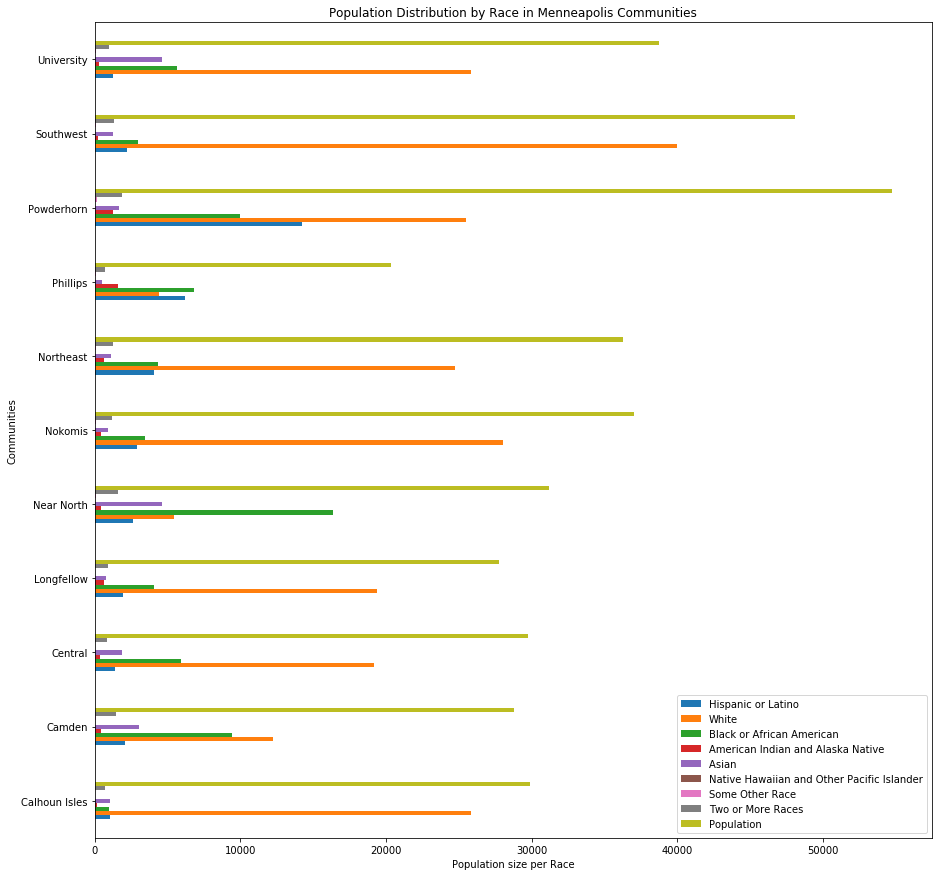

In [230]:
pop_plot = p_data.plot(kind='barh', figsize=(15, 15))
pop_plot.set_ylabel("Communities")
pop_plot.set_xlabel("Population size per Race")
pop_plot.set_title("Population Distribution by Race in Menneapolis Communities")

### for an average of about 30,000 person in each community, white are the most predominant race followed by African American and the Asian population are most concentrated around the university community, Near North and Camdem area 

Bar chart showing population distribution of Asians in the various communities in Mnneapolis

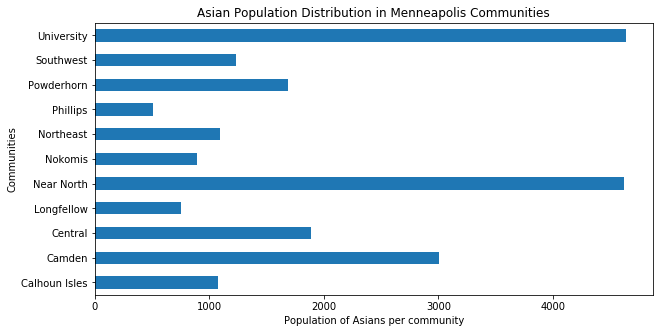

In [231]:
pd_asian = p_data['Asian '].plot(kind='barh', figsize=(10, 5))
pd_asian.set_ylabel("Communities")
pd_asian.set_xlabel("Population of Asians per community")
pd_asian.set_title("Asian Population Distribution in Menneapolis Communities")
pd_asian

### horizontal bar chart depicting only the size of the Asian population per community per as its a key determining factor for my client business decisons.
we clearly see Asian population desity most concentrated around the University, Near North and Camden communities respectively 

PIE Chart to visualize percentage distribution of the population

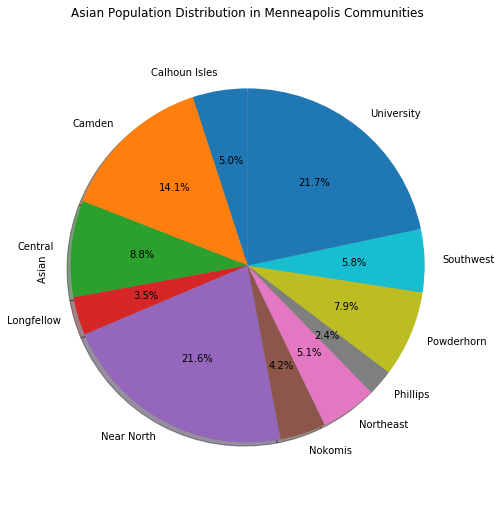

In [232]:
# autopct create %, start angle represent starting point
p_data['Asian '].plot(kind='pie',
                            figsize=(7, 9),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (university)
                            shadow=True,       # add shadow      
                            )

plt.title("Asian Population Distribution in Menneapolis Communities")
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### From the above bar and pie charts we can infere that communities with the most concentration of Asian poputlation are
#### University with a 21.7% of the total population, it belongs to cluster 3
#### Near North with a 21.6% of the total population, belonging to cluster 3
#### Candem with a 14.1% of the total population and in cluster 2 as well
this is logical as a greater proportions of ASIAN restaurants are also concentrated there



# 4. Conclusions

## Considering the initial creteria stated in section 1 -problem statement, 
  #### Office size within 2000 - 7000 sq ft
  #### Atleast one Asian restaurant with 2 mile radius, coffee shop and Grocery
  #### Asian community be most predominant or most important in the area
  #### within one mile from bus station or bus-stop
  #### Manufacturing plant be Within 5 miles of major Office and a major retail center
  #### Manufacturing plant with 5 miles of a industrial employment district
  #### Low crime rate

From the above analysis its deduced the the best fit for the business headquarters would be 
### 400 N 1st St , sqft 6638 priced at $105876.1/yr 
This location practically meets all location creteria, its found in Cluster 2 North Loop, less than 2 miles away from the warehouse district and distribution center favorable for manufacturing and warehousing
0.5 miles away from major Asain (Chinesse and Vietnamese) Restaurants, less than 2 miles miles away from the University and Near North
in clusters 3 which has the most densely population settlements of Asians and very low in crime, it equaly sit at the heart of the transit stations and closest to the major distribution centers and under5 miles from the industrial employement distric
the office space of  6638 sqft i well suited as illustrated below.

![title](best_office_loc.JPG)

# Actual Street and Office Location view of 400 N 1st St, MN

![title](https://images2.loopnet.com/i2/JOGlXfKZzDX__VYnYa5pMhE568iIOpajoqGh8Y76mS8/110/image.jpg)

THE END!

Its been a very Challenging experience, yet rewarding. lots new libraires, tools and methods learned.
Many thanks to my classmates and Instructors alike. 
Please leave a message if you have dounbts in any section of this presentation and i will be glad to return your text
Thank you!
Elvis Yem